# Clustering 

Clustering is a set of techniques used to partition data into groups, or clusters. Clusters are loosely defined as groups of data objects that are more similar to other objects in their cluster than to data objects in other clusters. Clustering refers to a very broad set of techniques for finding subgroups or clusters in a data set. This is unsupervised problem because we are trying to discover structure, in this case, distinct clusters on the basis of a dataset.

## Clustering Types 

There are three basic types of clustering algorithms : partitional, hierarchical and density based algorithms.

- **Partitional Clustering**: divides data objects into nonoverlapping groups. In other words, no object can be a member of more than one cluster, and every cluster must have at least one object. Example : K-Means and K-Medoids.
- **Hierarchical Clustering**: determines cluster assignments by building a hierarchy. This is implemented by either a bottom-up or a top-down approach. These methods produce a tree-based hierarchy of points called a dendrogram. Example : Agglomerative clustering and divisive clustering.
- **Density Based Clustering**: determines cluster assignments based on the density of data points in a region. This approach doesn’t require the user to specify the number of clusters. Instead, there is a distance-based parameter that acts as a tunable threshold. Example : DBSCAN (Density-Based Spatial Clustering of Applications with Noise) and OPTICS (Ordering Points To Identify the Clustering Structure).


### Loading the libraries 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.cm as cm
import seaborn as sns
import scipy.cluster.hierarchy as sch
import sklearn.utils

from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster import hierarchy
from yellowbrick.cluster import KElbowVisualizer

%matplotlib inline
sns.set_style('whitegrid')

### Loading the data 

The next step is loading the dataset. The data consist of mall customer data found [here](https://www.kaggle.com/shwetabh123/mall-customers) (*the dataset has been provided to you in the Lab folder*). The data shows the annual income and the spending score of the customer based on genre and age. Identification of customers based on their choices is an important strategy in any organization. This identification may help in approaching customers with specific offers. An organization with a large number of customers may experience difficulty in identifying and placing into a record each customer. A huge amount of data processing and automated techniques are involved in extracting insights from the large information collected on customers. Clustering methods can help to identifying the customers based on their key characteristics. 

In [3]:
# Load the data from the mall_customers.csv file in a new variable named input_data 
# Print the dimensionality of the data and view the first few rows of the DataFrame

input_data = pd.read_csv("mall_customers.csv", sep=",")
print(input_data.shape)
input_data.head()

(200, 5)


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# For simplicity, let's only work with the features "Annual Income (k$)" and "Spending Score (1-100)"
# Set the index to "CustomerID" and keep only the afore-mentioned features using either drop() or indexing 

input_data.set_index('CustomerID', inplace=True)
input_data = input_data.loc[:, ["Annual Income (k$)","Spending Score (1-100)"] ]
input_data.head()

,Annual Income (k$),Spending Score (1-100)
CustomerID,,
1,15,39
2,15,81
3,16,6
4,16,77
5,17,40


### Exploratory Data Analysis (EDA)  

Let's start the analysis by getting a sense of the data: 

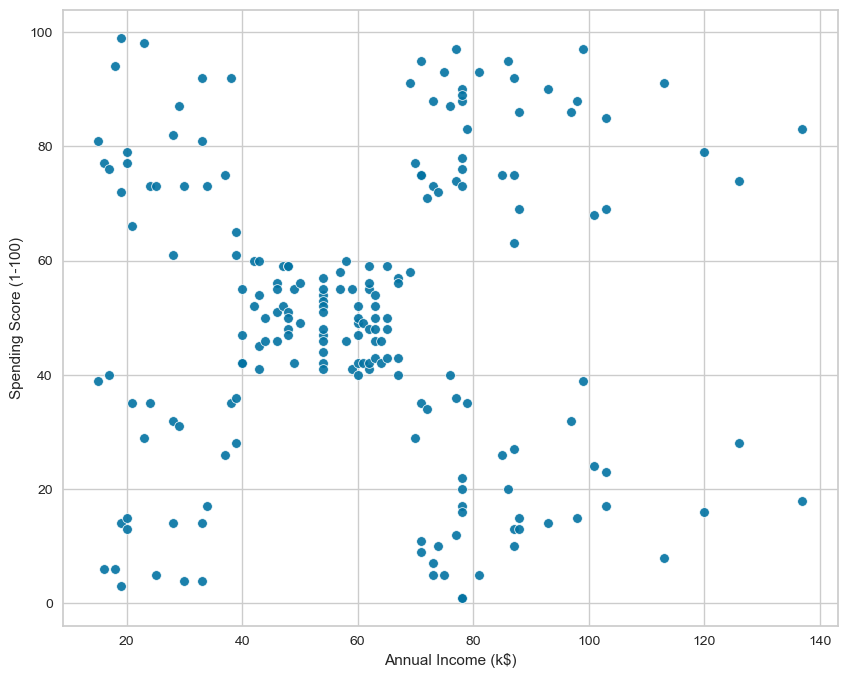

In [5]:
# Plot the features "Annual Income (k$)" and "Spending Score (1-100)" in a scatterplot against each other

plt.figure(figsize=(10, 8))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=input_data, alpha=0.9)
plt.show();

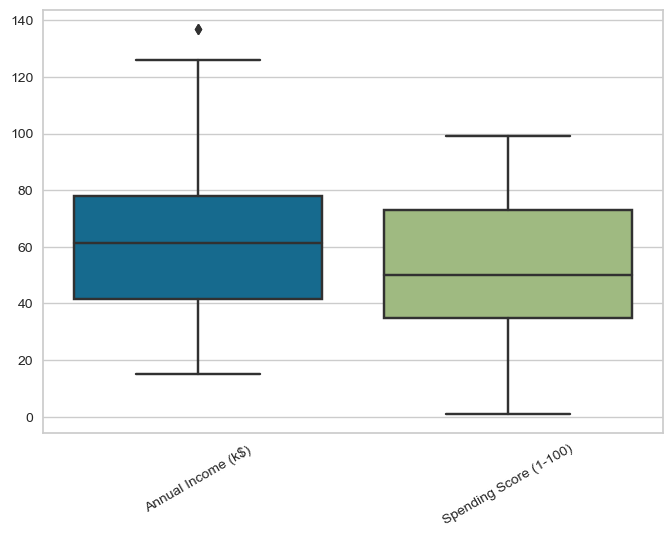

In [6]:
# Use a boxplot to check for any differences in feature ranges (scales)

ax = sns.boxplot(data=input_data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.show();

### Data pre-processing



#### Scaling 

Since the clusturing algos use distance as a metric to create categories, we need to scale the data. In this case, we’ll use the `StandardScaler` class.

In [7]:
# Instantiate the StandardScaler and fit_transform the input_data. 
# Save the results in a new variable named X_scaled 

scaler   = StandardScaler()
X_scaled = scaler.fit_transform(input_data)

### K-means 

K-means clustering is a method for finding clusters and cluster centers in a set of unlabeled data. Given an initial set of K centers, the K-means algorithm alternates the two steps:

- for each center we identify the subset of training points (its cluster) that is closer to it than any other center;
- the means of each feature for the data points in each cluster are computed, and this mean vector becomes the new center for that cluster.
These two steps are iterated until the centers no longer move or the assignments no longer change. Then, a new point x can be assigned to the cluster of the closest prototype.



In [8]:
# Instantiate a KMeans object with a n_clusters = 2
# Store it in a variable named "km" 
# Fit the km model on the X_scaled data 
# Use the predict() function or the labels_ parameter to get the assinged clusters 
# Save the results in a new variable "cluster_assignment"

km = KMeans(n_clusters = 2)
cluster_assignment = km.fit_predict(X_scaled)
cluster_assignment

C:\Users\dchatzopoulou\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0])

In [9]:
input_data["KMCluster"] = cluster_assignment
input_data.head(10)

,Annual Income (k$),Spending Score (1-100),KMCluster
CustomerID,,,
1,15,39,1
2,15,81,0
3,16,6,1
4,16,77,0
5,17,40,1
6,17,76,0
7,18,6,1
8,18,94,0
9,19,3,1


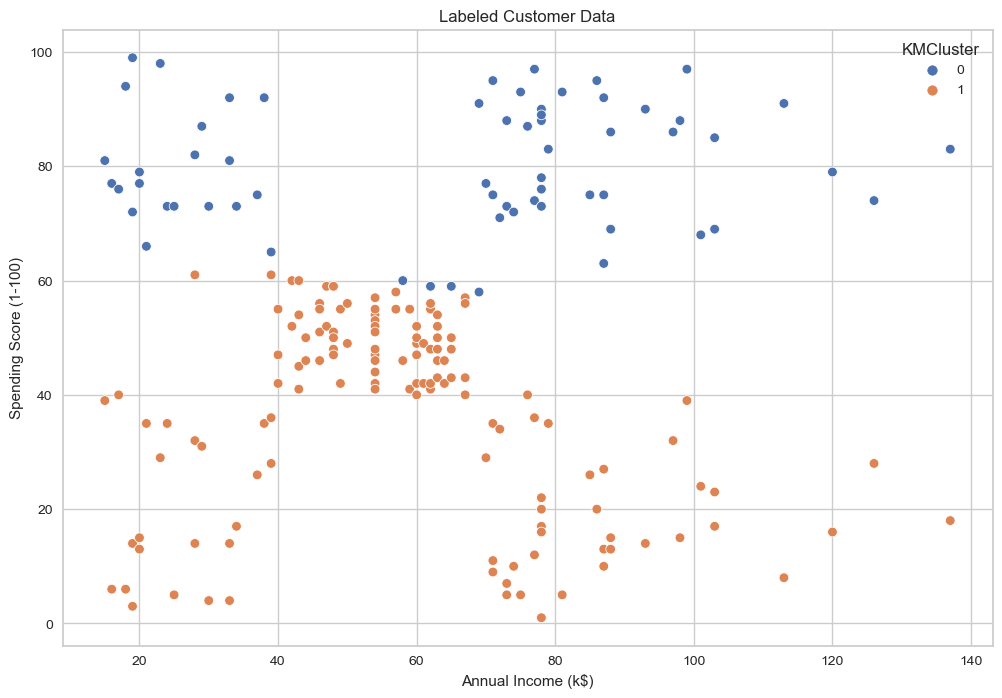

In [10]:
# Visualize the clusters using a scatterplot and hue as the "KMCluster"

plt.figure(figsize=(12,8))

sns.scatterplot(x='Annual Income (k$)', 
                y='Spending Score (1-100)', 
                data=input_data, 
                hue= "KMCluster",
                palette="deep"
               ).set_title('Labeled Customer Data')

plt.show()

#### Elbow method 

Elbow Method : There’s a sweet spot where the SSE curve starts to bend known as the elbow point. The x-value of this point is thought to be a reasonable trade-off between error and number of clusters. The elbowpoint is the point where the rate of decrease of mean distance i.e. SSE will not change significantly with increase in number of clusters.

C:\Users\dchatzopoulou\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\dchatzopoulou\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\dchatzopoulou\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\dchatzopoulou\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known

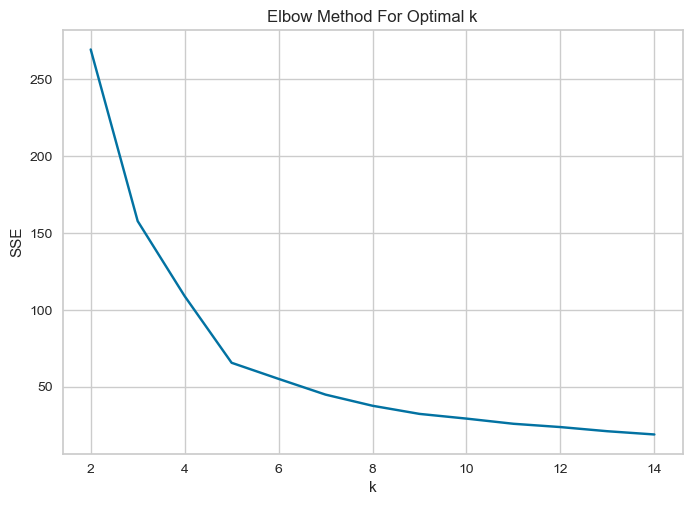

In [11]:
# Create an empty list for sum of squared distances to be appended for k values 2 to 15
Sum_of_squared_distances = [] 

# Values for K (centroids) 
K = range(2, 15)

for k in K:
    km = KMeans(n_clusters =k)
    km = km.fit(X_scaled)
    
    # model.inertia_: Sum of squared distances of samples to their closest cluster center, 
    # weighted by the sample weights if provided 
    # (from documentation - https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Elbow Method For Optimal k')
plt.show()


#### Silhouette Coefficient 

Is a measure of cluster cohesion and separation. It quantifies how well a data point fits into its assigned cluster based on two factors: How close the data point is to other points in the cluster and how far away the data point is from points in other clusters. Silhouette coefficient values range between -1 and 1. Larger numbers indicate that samples are closer to their clusters than they are to other clusters.

C:\Users\dchatzopoulou\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\dchatzopoulou\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\dchatzopoulou\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\dchatzopoulou\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known

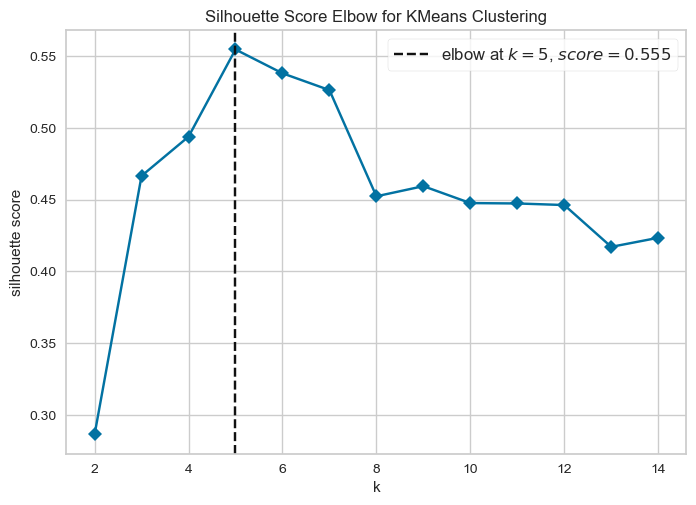

In [12]:
model = KMeans(random_state=123) 

visualizer = KElbowVisualizer(model, k=(2, 15), metric='silhouette', timings=False)
visualizer.fit(X_scaled)    
visualizer.poof()
plt.show();

After finding the optimal number of clusters, fit the K-Means clustering model to the dataset and then predict clusters for each of the data elements.

In [13]:
opt_k = 5

# Instantiate a KMeans object with the OPTIMAL k as found above 
# Store it in a variable named "kmodel" 
# Fit the kmodel model on the X_scaled data and use the predict() function (or fit_predict() directly) 
# to get the assinged clusters for each point 
# Save the results in a new variable "cluster_assignment"

kmodel = KMeans(n_clusters=opt_k)
cluster_assignment = kmodel.fit_predict(X_scaled)
cluster_assignment

C:\Users\dchatzopoulou\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 1,
       0, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 2, 1, 2, 3, 2, 3, 2,
       1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2])

After we get the cluster of each data, then we add the new column, by naming it as “Cluster”.

In [14]:
input_data["KMCluster"] = cluster_assignment
input_data.head(10)

,Annual Income (k$),Spending Score (1-100),KMCluster
CustomerID,,,
1,15,39,0
2,15,81,4
3,16,6,0
4,16,77,4
5,17,40,0
6,17,76,4
7,18,6,0
8,18,94,4
9,19,3,0


In [15]:
# Get the centroids of each cluster 
kmodel.cluster_centers_

array([[-1.30751869, -1.13696536],
       [-0.20091257, -0.02645617],
       [ 0.99158305,  1.23950275],
       [ 1.05500302, -1.28443907],
       [-1.32954532,  1.13217788]])

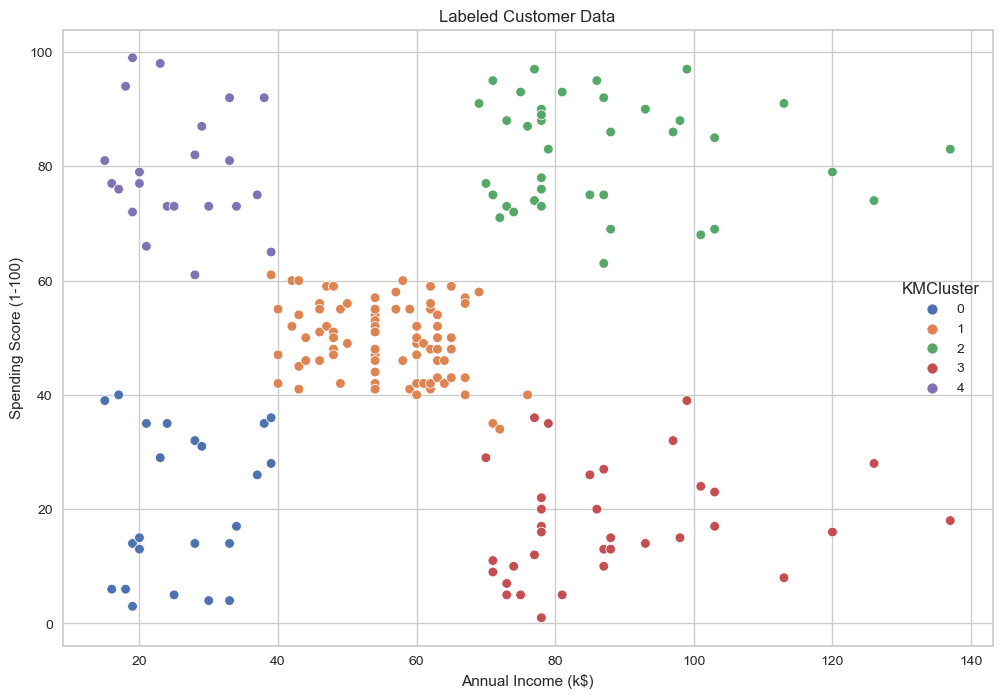

In [16]:
# Visualize the clusters 
plt.figure(figsize=(12,8))

sns.scatterplot(x='Annual Income (k$)', 
                y='Spending Score (1-100)', 
                data=input_data, 
                hue= "KMCluster",
                palette="deep"
               ).set_title('Labeled Customer Data')

plt.show()

From the figure above, it can be seen that 5 clusters of customers have been formed. The clusters can be interpreted as:

- Target Group
- Sensible
- Careless
- Careful
- Standard

#### Kmeans clustering on the results of PCA 

In [17]:
# Apply PCA using 2 principal components 
# Instantiate the PCA object using n_components=2 and store as "pca"
# Apply fit_transform() on the X_scaled data and store into a new variable named "pc_scores"
# Convert the pc_scores to a pd.DataFrame with columns=["PC1", "PC2"] 
# print the pca.explained_variance_ratio_.cumsum()

pca = PCA(n_components=2)
pc_scores = pca.fit_transform(X_scaled)
pc_scores = pd.DataFrame(pc_scores, columns=["PC1", "PC2"])
pca.explained_variance_ratio_.cumsum()

array([0.50495142, 1.        ])

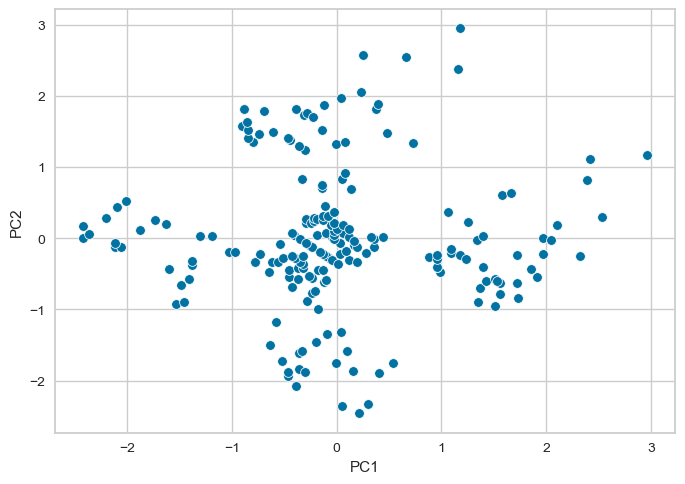

In [18]:
# Plot the 2 Principal Components (PC scores) in a scatterplot 

sns.scatterplot(x="PC1", y="PC2", data=pc_scores)
plt.show();

In [19]:
# Instantiate a KMeans object with the OPTIMAL k as found above 
# Store it in a variable named "kmodel" 
# Fit the kmodel model on the pc_scores(!!) data and use the predict() function (or fit_predict() directly) 
# to get the assinged clusters for each point 
# Save the results in a new variable "cluster_assignment" 
# Save the output of cluster_assignment to pc_scores["KMCluster"]  

kmodel = KMeans(n_clusters=opt_k)
cluster_assignment = kmodel.fit_predict(pc_scores)
pc_scores["KMCluster"] = cluster_assignment

C:\Users\dchatzopoulou\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


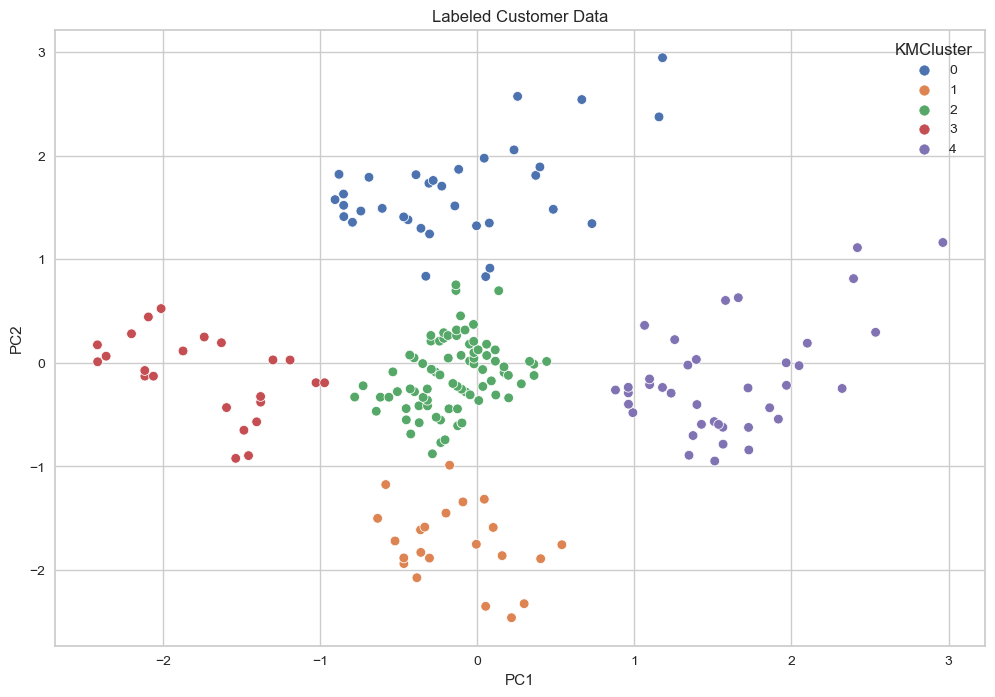

In [20]:
# Plot the 2 Principal Components (PC scores) in a scatterplot using the "KMCluster" as hue

plt.figure(figsize=(12,8))

sns.scatterplot(x='PC1', 
                y='PC2', 
                data=pc_scores, 
                hue= "KMCluster",
                palette="deep"
               ).set_title('Labeled Customer Data')

plt.show()

### Hierarchical Clustering

Hierarchical clustering involves creating clusters that have a predetermined ordering from top to bottom. There are two types of hierarchical clustering, Agglomerative and Divisive.

- Divisive Clustering : the type of hierarchical clustering that uses a top-down approach to make clusters. It uses an approach of the partitioning of 2 least similiar clusters and repeats this step until there is only one cluster. Divisive clustering is not commonly used in real life.
- Agglomerative Clustering : the type of hierarchical clustering which uses a bottom-up approach to make clusters. It uses an approach of the partitioning 2 most similiar clusters and repeats this step until there is only one cluster. 


![alt text](hca.png "HCA")


#### Plot a dendrogram 

Use the function `linkage()` from `scipy.cluster.hierarchy` to cluster the scaled data and pass the result to the function `dendrogram()` to visualise the result. Trunc the dendrogram if the initial result is unreadable.

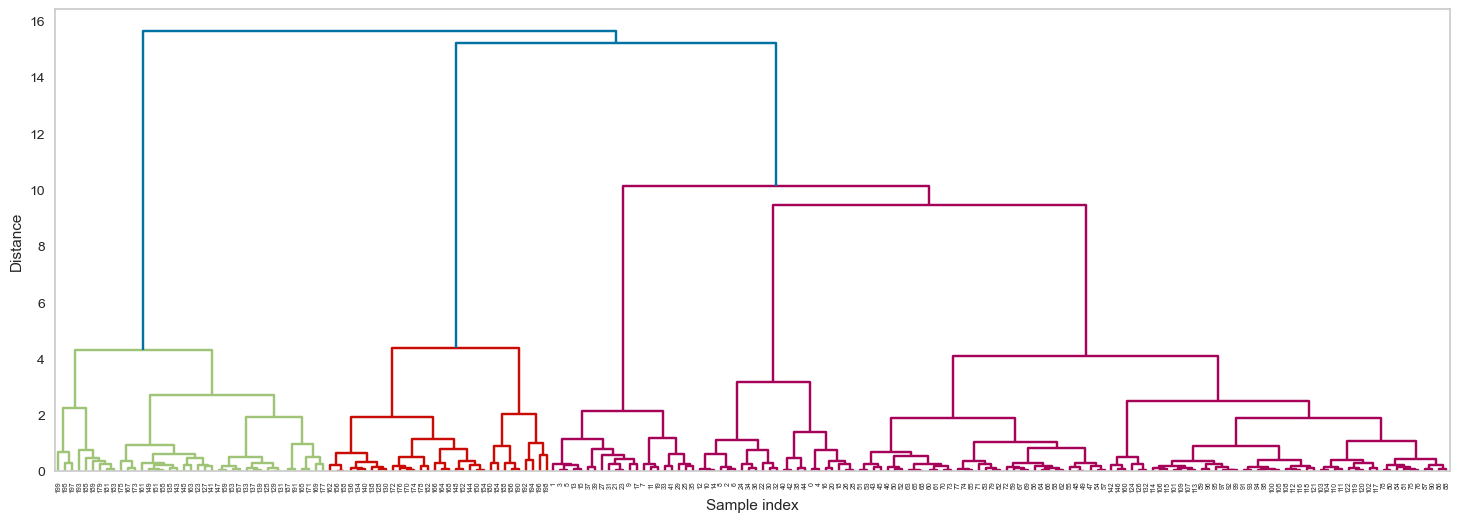

In [21]:
# Apply hierarchical clustering 
Z = linkage(X_scaled, method='ward', metric='euclidean')

# Draw the dendrogram
plt.figure(figsize=(18,6))
dendrogram(Z)
plt.ylabel('Distance')
plt.xlabel('Sample index')
plt.grid(False)
plt.show()

We can improve the readability of the dendrogram showing only the last merged clusters and a threshold to color the clusters:

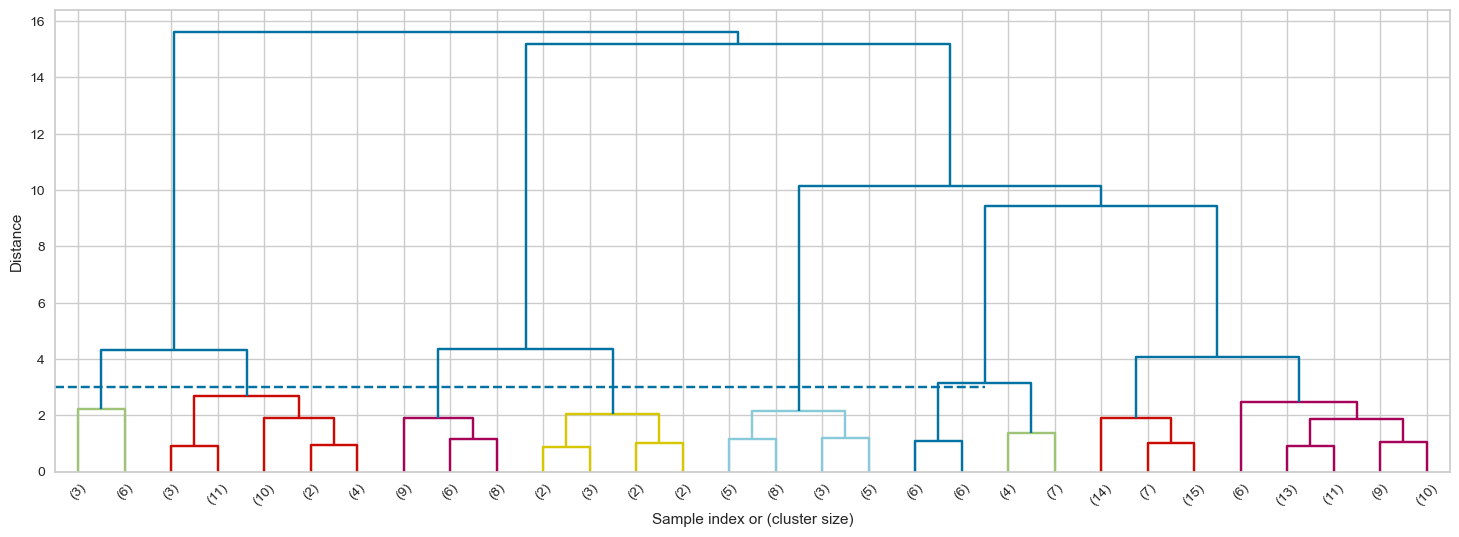

In [22]:
# Draw the dendrogram using a cut_off value

plt.figure(figsize=(18,6))
cut_off = 3

dendrogram(Z, color_threshold=cut_off,
           truncate_mode='lastp', 
           # show only the last p merged clusters
           # p=30
          )

plt.ylabel('Distance')
plt.xlabel('Sample index or (cluster size)')
plt.hlines(cut_off, 0, len(X_scaled), linestyle='--')
plt.show()

Note: try different cut-off values and see how the graph changes 

#### Implementing an Agglomerative Hierarchical Clustering using sklearn

Use `sklearn.cluster.AgglomerativeClustering` to cluster the input data according to the 3 clusters highlighted by the dendrogram above and visualise the result.

In [23]:
# Perform clustering with AgglomerativeClustering - try different distance and linkage algorithms 

hca_clusters = 5

agglomerative = AgglomerativeClustering(n_clusters=hca_clusters, 
                                        linkage = 'ward', # merges two clusters if the resulting has small variance
                                        affinity= 'euclidean')

cluster_assignment = agglomerative.fit_predict(X_scaled)
cluster_assignment

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 0, 1, 0, 1,
       2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int64)

In [24]:
input_data["HCACluster"] = cluster_assignment
input_data.head(10)

,Annual Income (k$),Spending Score (1-100),KMCluster,HCACluster
CustomerID,,,,
1,15,39,0,4
2,15,81,4,3
3,16,6,0,4
4,16,77,4,3
5,17,40,0,4
6,17,76,4,3
7,18,6,0,4
8,18,94,4,3
9,19,3,0,4


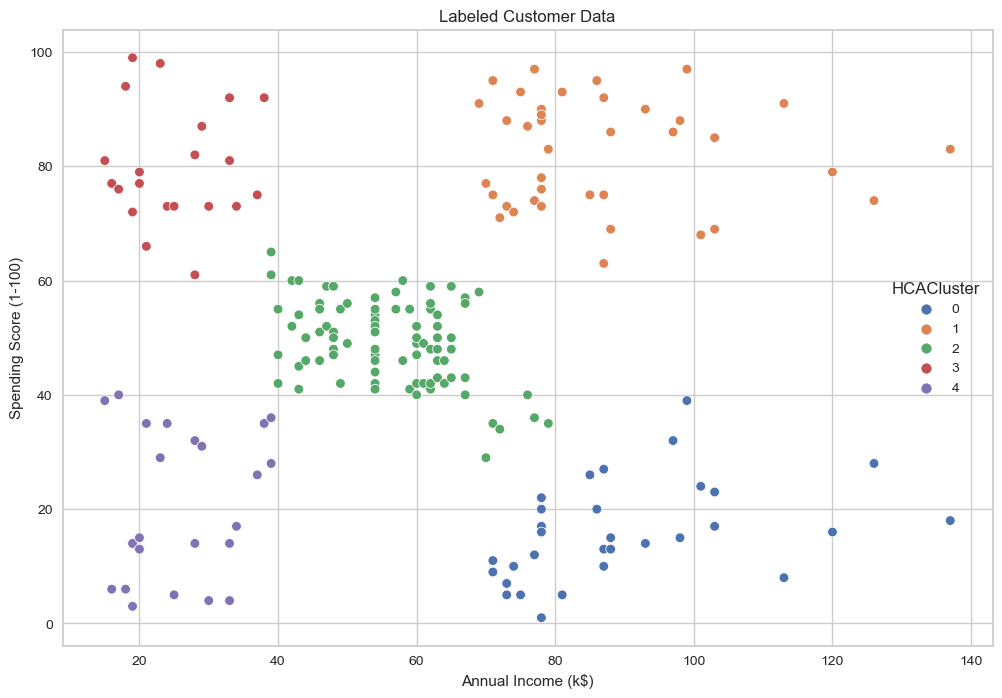

In [25]:
plt.figure(figsize=(12,8))

sns.scatterplot(x='Annual Income (k$)', 
                y='Spending Score (1-100)', 
                data=input_data, 
                hue= "HCACluster",
                palette="deep"
               ).set_title('Labeled Customer Data')
plt.show()

### DBSCAN

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a density based clustering algorithm. The main concept of DBSCAN algorithm is to locate regions of high density that are separated from one another by regions of low density.

DBSCAN can identify clusters in a large spatial dataset by looking at the local density of corresponding elements. The advantage of the DBSCAN algorithm over the K-Means algorithm, is that the DBSCAN can determine which data points are noise or outliers. DBSCAN can identify points that are not part of any cluster (very useful as outliers detector). But it slower than agglomerative clustering and k-means, but still scales to relatively large datasets.


#### Summary of the Algorithm:

Starts with an arbitrary starting point and retrieved all the points in the radius of distance eps from it
if the radius contains min_samples points, start a cluster
add all the points in the radius of distance eps to the cluster and their eps neighbors.
continue expanding the cluster iterating on the the procedure on all the neighbors
otherwise mark it as noise/outlier

There are two parameters in DBSCAN: `minPoints` and `eps` :

- `eps`: specifies how close points should be to each other to be considered a part of a cluster. It means that if the distance between two points is lower or equal to this value (eps), these points are considered to be neighbors.
- `minPoints`: the minimum number of data points to form a dense region/ cluster. For example, if we set the minPoints parameter as 5, then we need at least 5 points to form a dense region.

Sklearn implementation doc: http://scikit-learn.org/stable/modules/clustering.html#dbscan

In [26]:
# Apply DBSCAN
db = DBSCAN(eps=0.3, min_samples=5)
db.fit(X_scaled)
cluster_assignment = db.fit_predict(X_scaled) # alternatively, db.labels_
cluster_assignment

array([ 2,  0,  1,  0,  2,  0,  1, -1,  1,  0, -1, -1, -1,  0,  1,  0,  2,
        0,  2, -1,  2,  0,  1,  0, -1, -1,  2, -1,  2, -1, -1,  0, -1, -1,
       -1, -1, -1,  0, -1,  0,  3, -1,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  4,  3,  4,  3,  4,  5,  4,  5,  4,  3,  4,  5,  4,
        5,  4,  5,  4,  5,  4,  3,  4,  5,  4,  3,  4,  5,  4,  5,  4,  5,
        4,  5,  4,  5,  4,  5,  4,  3,  4,  5,  4,  6,  4,  6,  4,  6, -1,
        6,  4,  6,  4,  6,  4,  6,  4,  6,  4, -1,  4,  6,  4, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [27]:
print ('Number of clusters found', len(np.unique(cluster_assignment)))
print ('Clusters found', np.unique(cluster_assignment))

Number of clusters found 8
Clusters found [-1  0  1  2  3  4  5  6]


In [28]:
input_data['DBCluster'] = cluster_assignment
input_data

,Annual Income (k$),Spending Score (1-100),KMCluster,HCACluster,DBCluster
CustomerID,,,,,
1,15,39,0,4,2
2,15,81,4,3,0
3,16,6,0,4,1
4,16,77,4,3,0
5,17,40,0,4,2
...,...,...,...,...,...
196,120,79,2,1,-1
197,126,28,3,0,-1
198,126,74,2,1,-1


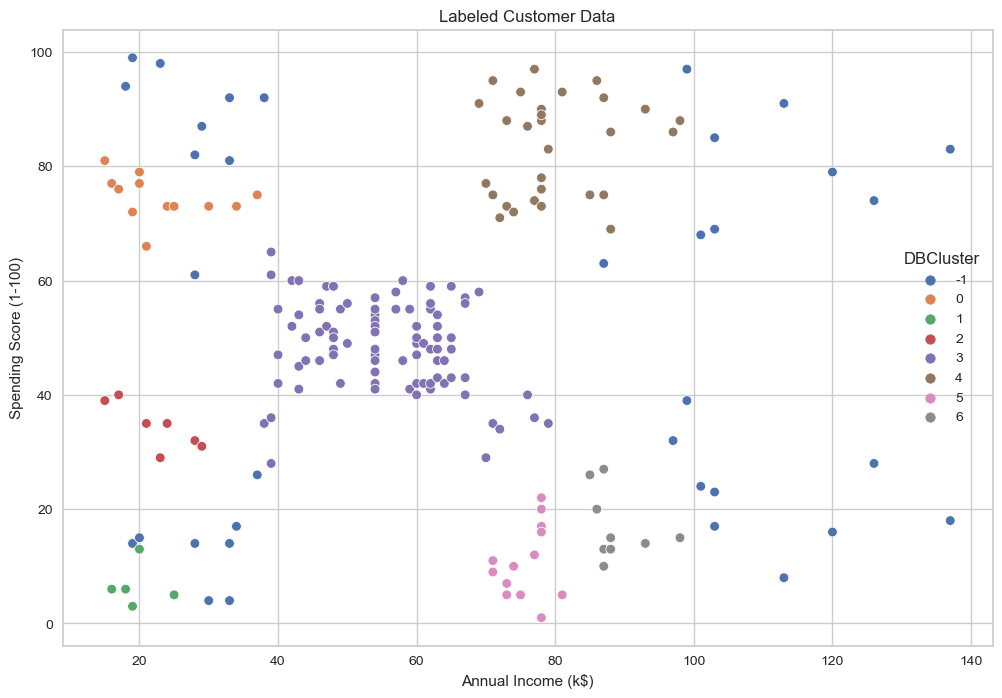

In [29]:
plt.figure(figsize=(12,8))

sns.scatterplot(x='Annual Income (k$)', 
                y='Spending Score (1-100)', 
                data=input_data, 
                hue= "DBCluster",
                palette="deep"
               ).set_title('Labeled Customer Data')
plt.show()

#### How many clusters with DBSCAN?
Vary `eps` and `min_samples` and study how the number of clusters varies as result. This way we'll have an idea of how many cluster we get varying the parameters. This can help us choose the parameters if we already have an idea of how many clusters we want to create.

In [30]:
# WARNING this may take a couple of minutes to finish!
eps  = np.linspace(.3, 2.0, 20)
mins = np.arange(3, 50, 2)
Z = np.zeros((len(eps), len(mins)))

for i, e in enumerate(eps):
    for j, m in enumerate(mins):
        db = DBSCAN(eps=e, min_samples=m)
        clusters_found = len(np.unique(db.fit_predict(X_scaled)))
        Z[i,j] = clusters_found

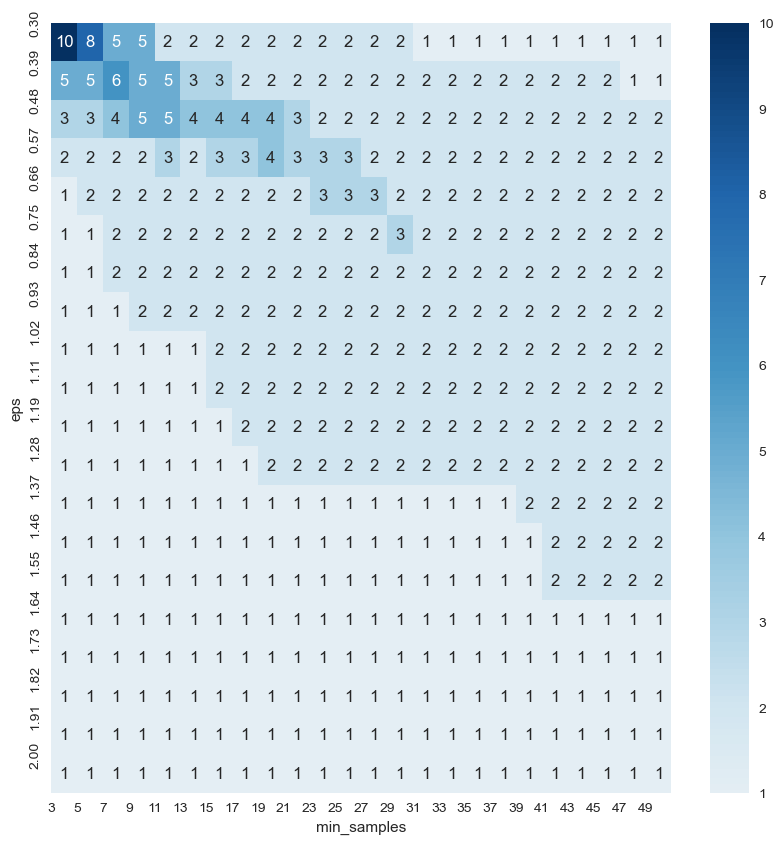

In [31]:
plt.figure(figsize=(10, 10))
sns.heatmap(Z, cmap='RdBu', center=0, annot=True);
plt.xticks(np.arange(Z.shape[1]), mins)
plt.xlabel('min_samples')
plt.yticks(np.arange(Z.shape[0]), ['%0.2f' % x for x in eps])
plt.ylabel('eps')
plt.show()